# RAG 

### to do

* metricas quantitativas e qualitativas
* implemntacao web ou interativa
* descricao do metodo e da implemtnacao
* inicar o relatorio apos a avaliacao
* falta o re ranking
* variar as respostas com llm
* olhar o que poderia ser interessante nas bonificacoes mas fazer o minimo

### Requisitos
- 4.1 Implementacao
- [ ] Pipeline RAG completo: 
    * chunking, 
    * embeddings,
    * retrieval, 
    * re-ranking, 
    * geracao
- [ ] Uso de modelos gratuitos ou de baixo custo
- [ ] Processamento de documento completo (PDF > 1000 p´aginas)
- [ ] Interface funcional (m´ınimo: notebook interativo)
- [ ] Avalia¸c˜ao com teste de pelo menos 20 perguntas






###  Bonificacoes
- 5.1 *Otimizacoes Avancadas*
* Implementacao de HyDE (Hypothetical Document Embeddings)
* Multi-query expansion com LLM
* Cross-encoder re-ranking
* Tecnicas de chunking adaptativo

- 5.2.  *Nıvel 2: Modelos Locais*
* Execucao completa com modelos locais (Llama, Mistral, etc.)
* Otimizacao para recursos limitados (quantizacao, LoRA)
* Comparacao detalhada: local vs. API

- 5.3 *Nıvel 3: Interface Web*
* Aplicacao web funcional (Streamlit, Gradio, Flask)
* Upload de documentos personalizado
* Historico de conversas
* Interface responsiva e intuitiva

- 5.4 *Nıvel 4: Deploy Online*
* Sistema funcionando online e acessıvel
* Uso de servicos cloud (Hugging Face Spaces, Railway, etc.)
* Documentacao para reproducao
* Demonstracao funcional durante apresentacao

- 5.5 *(Nıvel 5: GraphRAG)*
* Implementacao de GraphRAG (Microsoft Research)
* Construcao de grafo de conhecimento
* Comparacao detalhada: RAG tradicional vs. GraphRAG
* Analise de consultas complexas multi-hop

- 6 *Criterios de Avaliacao*
* Correcao e qualidade da documentacao tecnica
* Uso de tecnicas avancadas
* Originalidade na abordagem
* Integracao de multiplas tecnologias
* Contribuicoes alem do mınimo exigido
Analise crıtica dos resultados
* Qualidade da escrita academica

## Dados - Livros

download books: https://drive.google.com/drive/folders/1yhocUZ1cGfZiBg63hBlH8mXe2oHXYRuT?usp=sharing

Estrutura:
```
books-rag/
├── raw/                         # originais (NÃO edite)
│   ├── pdf/
│   └── epub/
├── working/                     # intermediários
│   ├── converted/               # md/txt por capítulo ou seção
│   ├── ocr/                     # PDFs escaneados corrigidos
│   └── manifests/               # CSV/JSON com inventário e status
├── corpus/                      # texto limpo + chunks com metadados
│   ├── jsonl/                   # um chunk por linha
│   └── parquet/                 # (opcional) rápido p/ análise
├── index/                       # índices de busca
│   ├── faiss/
│   └── bm25/
└── evaluation/                  # perguntas, gabaritos, logs

### Extract Book Data

In [61]:
!python src/extract_book_data.py \
  --root "/home/pdi_4/Documents/Documentos/rag/books_rag" \
  --pdf_dir "/home/pdi_4/Documents/Documentos/rag/books_rag/raw/pdf" \
  --epub_dir "/home/pdi_4/Documents/Documentos/rag/books_rag/raw/epub"

Encontrados: 14 PDF(s) em /home/pdi_4/Documents/Documentos/rag/books_rag/raw/pdf
Encontrados: 6 EPUB(s) em /home/pdi_4/Documents/Documentos/rag/books_rag/raw/epub
Chunking PDF Dorothy R. Kirk - Deciphering Object-Oriented Programming with C++ 
Traceback (most recent call last):
  File "/home/pdi_4/Documents/Documentos/rag/src/extract_book_data.py", line 332, in <module>
    main()
  File "/home/pdi_4/Documents/Documentos/rag/src/extract_book_data.py", line 307, in main
    info = process_pdf(p, out_dir, args.max_chars, args.overlap, args.min_chars)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/pdi_4/Documents/Documentos/rag/src/extract_book_data.py", line 202, in process_pdf
    for pageno, raw in iter_pdf_pages(pdf_path):
  File "/home/pdi_4/Documents/Documentos/rag/src/extract_book_data.py", line 115, in iter_pdf_pages
    interpreter.process_page(page)
  File "/home/pdi_4/anaconda3/envs/rag_book/lib/python3.11/site-packages/pdfminer/p

In [ ]:
!python src/check_chunks.py \
  --jsonl-dir "/home/pdi_4/Documents/Documentos/rag/books_rag/corpus/jsonl" \
  --min-len 100 \
  --top 15 \
  --out-dir "/home/pdi_4/Documents/Documentos/rag/books_rag/working/reports"

[OK] Histograma salvo em: /home/pdi_4/Documents/Documentos/rag/books_rag/working/reports/hist_tamanhos_chunks.png
[OK] Barra (top curtos) salva em: /home/pdi_4/Documents/Documentos/rag/books_rag/working/reports/top_taxa_chunks_curtos.png
[OK] Tabela (amostra) salva em: /home/pdi_4/Documents/Documentos/rag/books_rag/working/reports/tabela_resumo_amostra.png
[OK] CSV salvo em: /home/pdi_4/Documents/Documentos/rag/books_rag/working/reports/resumo_chunks_por_livro.csv

✓ Relatórios gerados em: /home/pdi_4/Documents/Documentos/rag/books_rag/working/reports


### Relatórios em: `/home/pdi_4/Documents/Documentos/rag/books_rag/working/reports`

Encontradas **3** imagens: `hist_tamanhos_chunks.png`, `tabela_resumo_amostra.png`, `top_taxa_chunks_curtos.png`

#### Visualização simples

**hist_tamanhos_chunks.png**

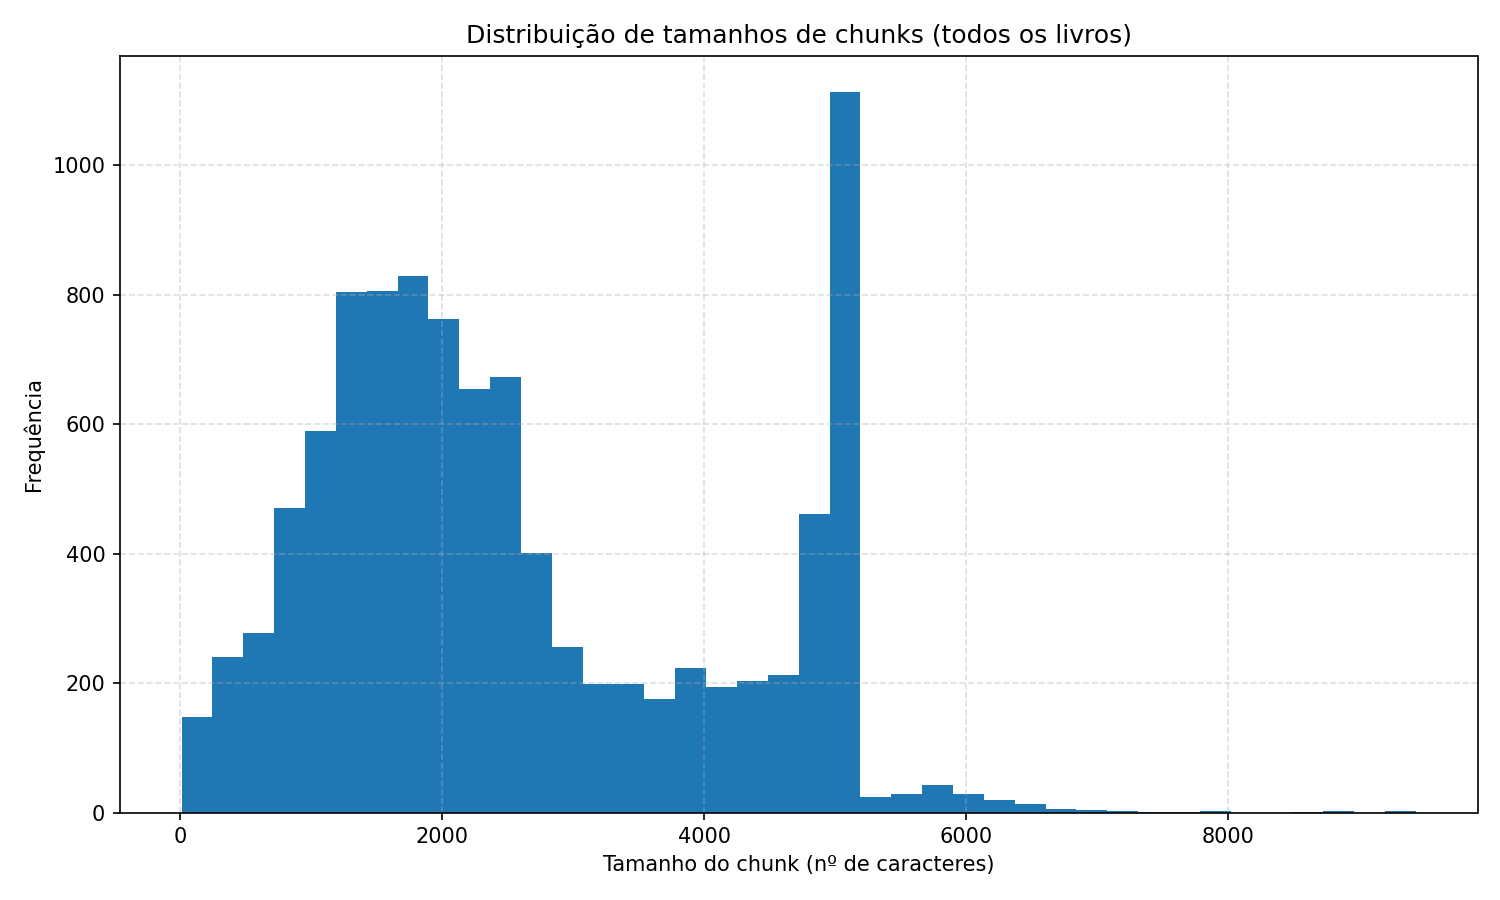

**tabela_resumo_amostra.png**

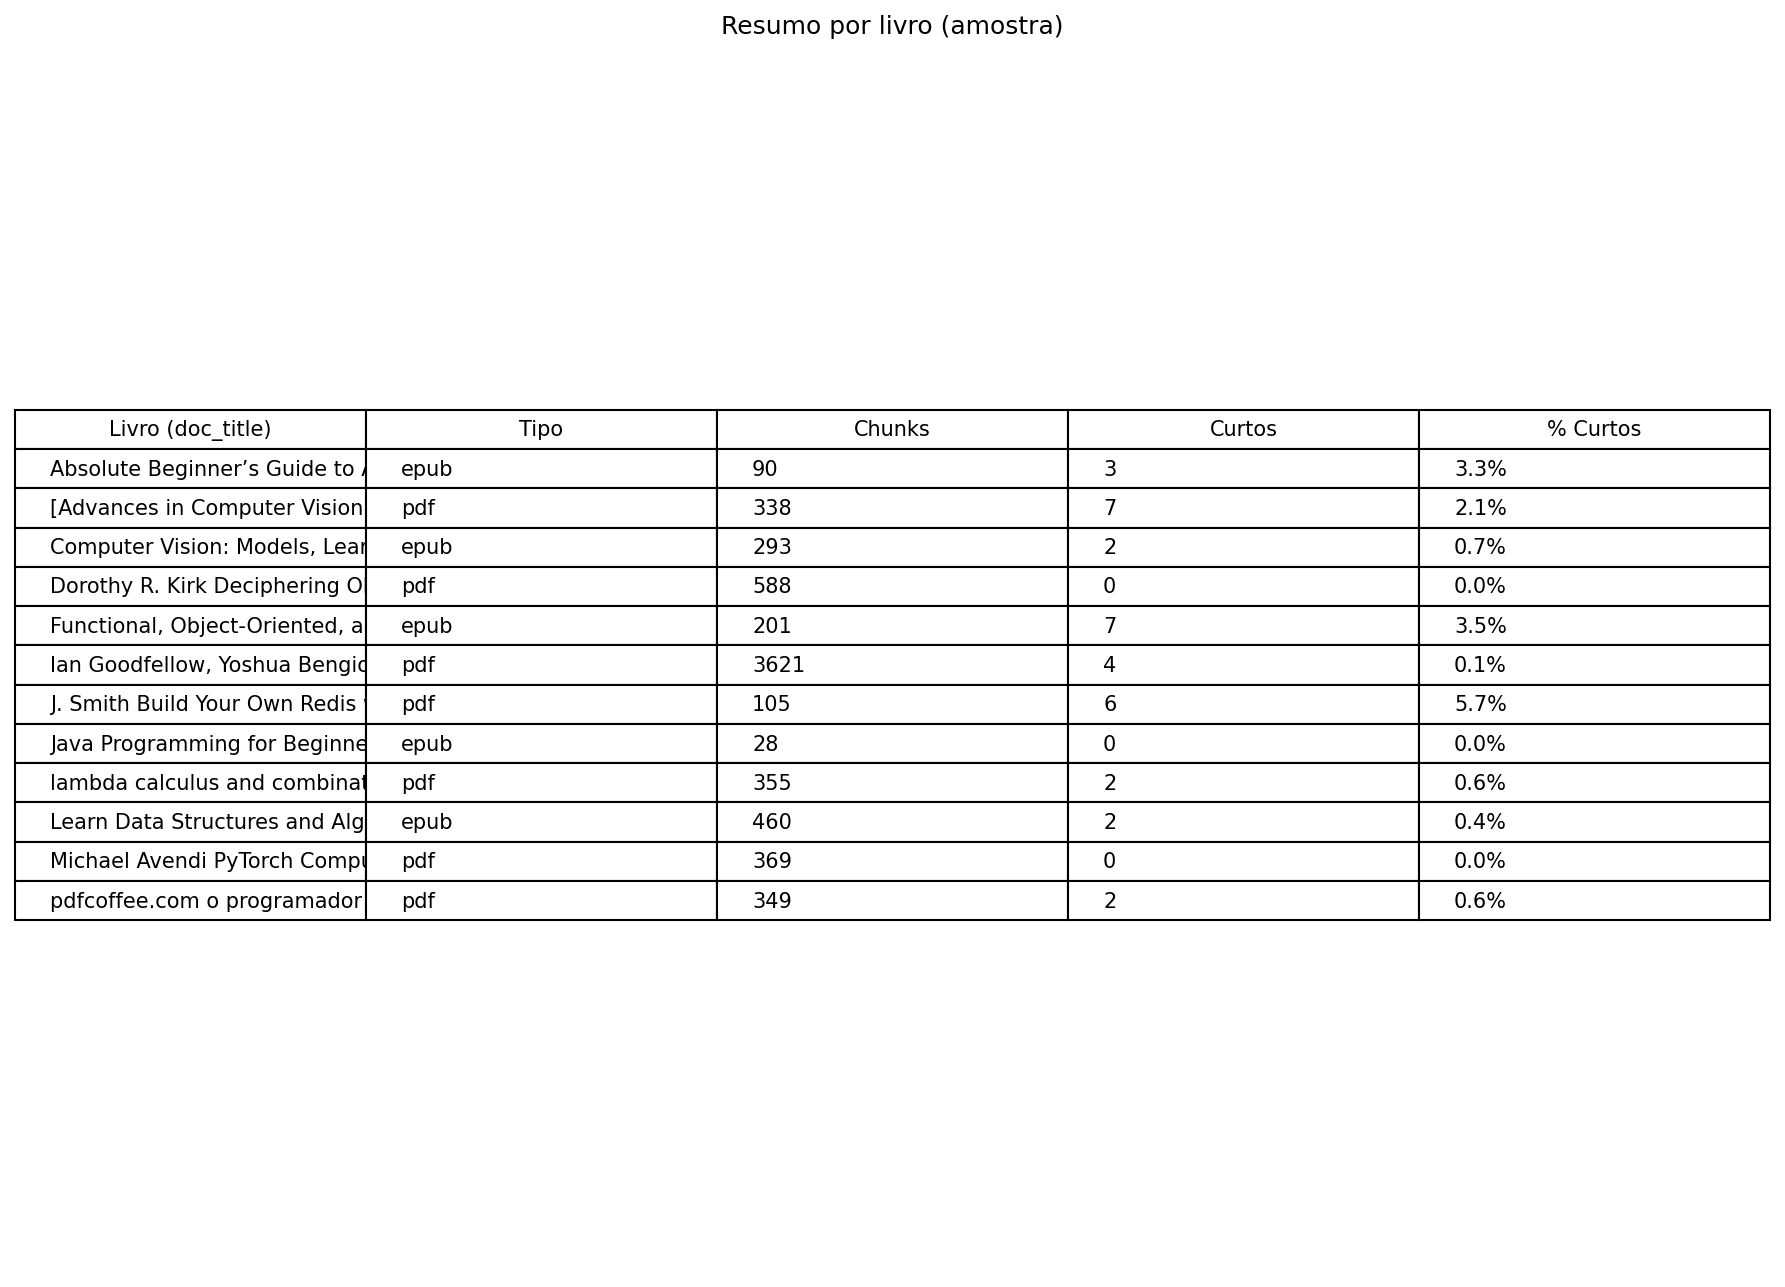

**top_taxa_chunks_curtos.png**

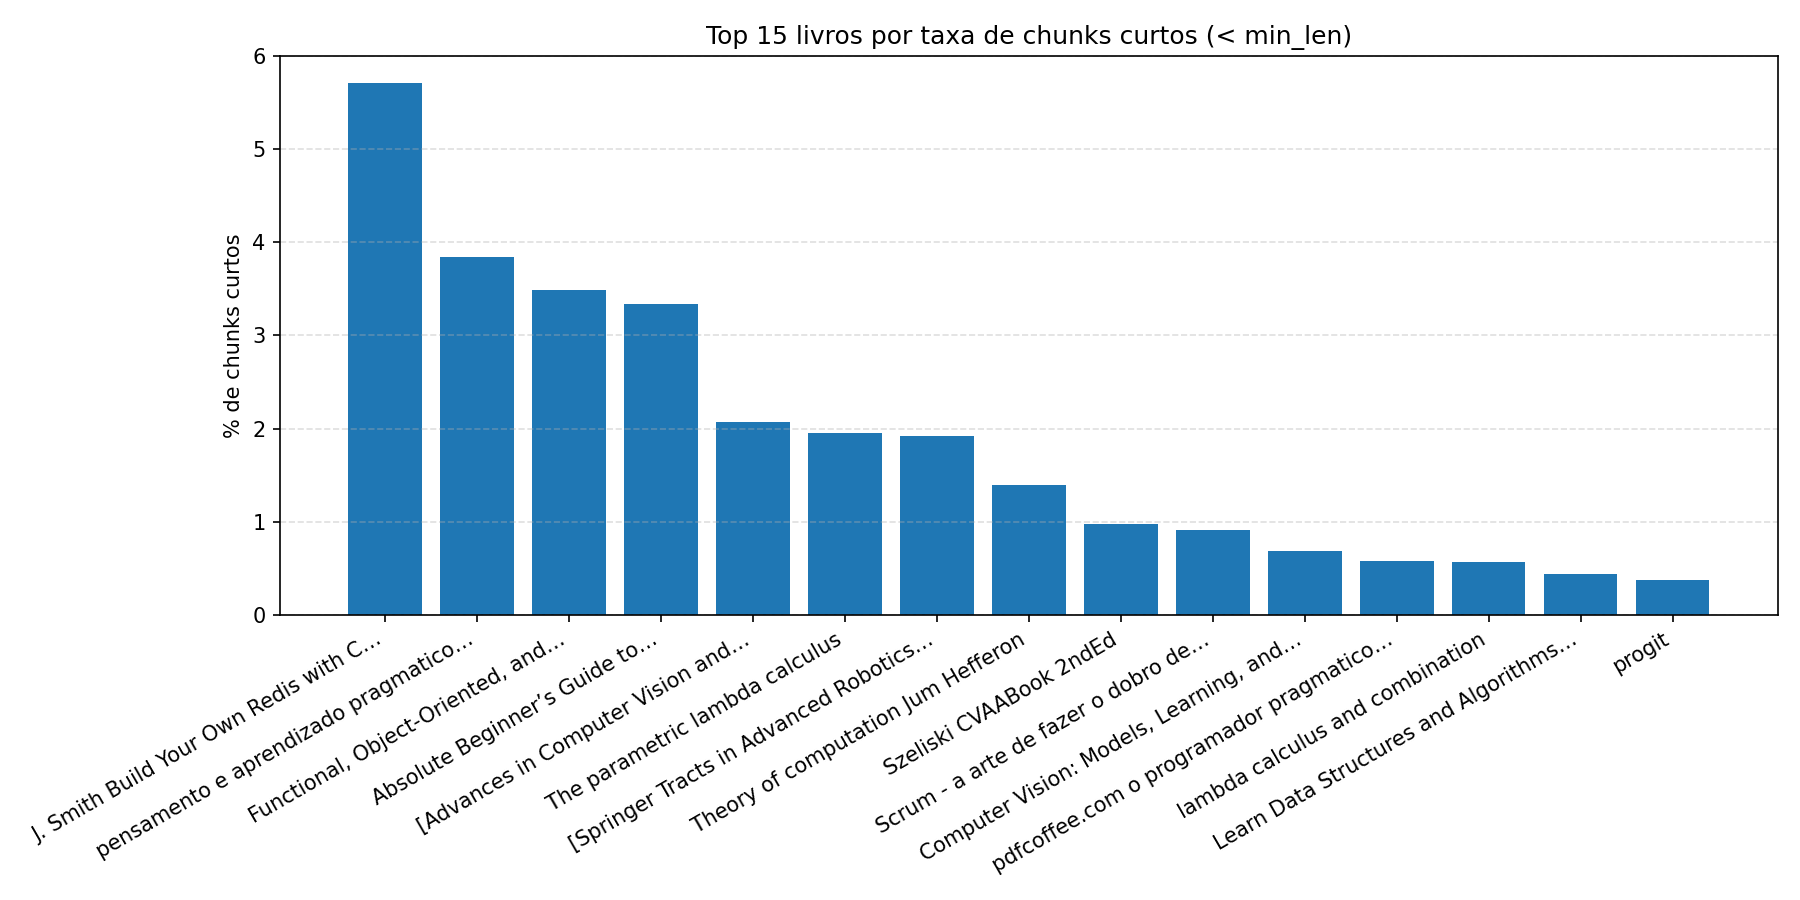

#### Visualização em grade (matplotlib)

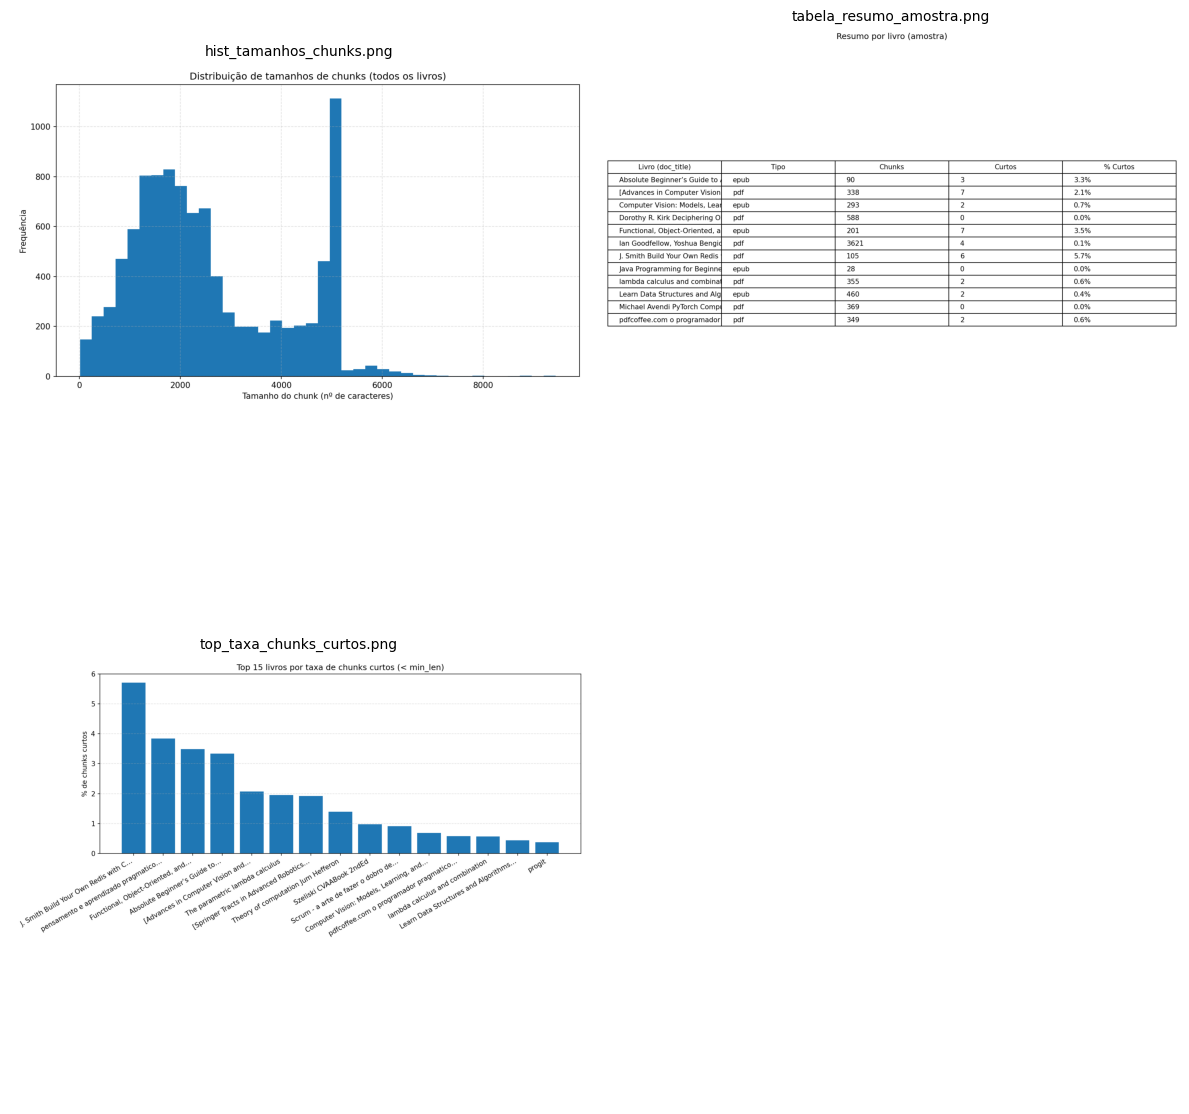

In [ ]:
# %% Exibir relatórios (imagens) de forma robusta no Jupyter

from pathlib import Path
from IPython.display import display, Markdown, Image as IPyImage
import math

# Ajuste este caminho:
REPORT_DIR = Path("/home/pdi_4/Documents/Documentos/rag/books_rag/working/reports").expanduser().resolve()

pngs = sorted(REPORT_DIR.glob("*.png"))
assert pngs, f"Nenhuma imagem .png encontrada em {REPORT_DIR}"

display(Markdown(f"### Relatórios em: `{REPORT_DIR}`"))
display(Markdown(f"Encontradas **{len(pngs)}** imagens: " + ", ".join(f"`{p.name}`" for p in pngs)))

# ---------------------------
# 1) Modo simples (garantido)
# ---------------------------
display(Markdown("#### Visualização simples"))
for p in pngs:
    display(Markdown(f"**{p.name}**"))
    display(IPyImage(filename=str(p)))

# --------------------------------------
# 2) Modo grade legível (via matplotlib)
# --------------------------------------
display(Markdown("#### Visualização em grade (matplotlib)"))

import matplotlib.pyplot as plt
from PIL import Image

IMGS_PER_ROW = 2   # mude para 3 se preferir
FIG_W = 12         # largura da figura (em polegadas)
TITLE_WRAP = 60    # caracteres no título antes de quebrar linha

rows = math.ceil(len(pngs) / IMGS_PER_ROW)
fig, axes = plt.subplots(rows, IMGS_PER_ROW, figsize=(FIG_W, 6*rows))
if rows == 1 and IMGS_PER_ROW == 1:
    axes = [[axes]]
elif rows == 1:
    axes = [axes]
elif IMGS_PER_ROW == 1:
    axes = [[ax] for ax in axes]

for i, p in enumerate(pngs):
    r, c = divmod(i, IMGS_PER_ROW)
    ax = axes[r][c]
    img = Image.open(p)
    ax.imshow(img)
    ax.set_title("\n".join([p.name[i:i+TITLE_WRAP] for i in range(0, len(p.name), TITLE_WRAP)]), fontsize=10)
    ax.axis('off')

# apaga eixos vazios se #imagens não fechar a grade
for j in range(len(pngs), rows*IMGS_PER_ROW):
    r, c = divmod(j, IMGS_PER_ROW)
    axes[r][c].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#!/usr/bin/env python3
"""
Mostra a tabela do CSV de resumo gerado pelo check_chunks.py
"""

import pandas as pd
from pathlib import Path

# Ajuste este caminho para onde o check_chunks.py salvou o CSV
CSV_PATH = Path("/home/pdi_4/Documents/Documentos/rag/books_rag/working/reports/resumo_chunks_por_livro.csv")

def main():
    if not CSV_PATH.exists():
        print(f"[ERRO] Arquivo não encontrado: {CSV_PATH}")
        return
    
    # Lê o CSV
    df = pd.read_csv(CSV_PATH)
    
    # Renomeia colunas para algo mais legível (opcional)
    colmap = {
        "filename": "arquivo",
        "doc_title": "livro (doc_title)",
        "format": "tipo",
        "total_chunks": "chunks",
        "short_chunks": "curtos",
        "short_pct": "% curtos"
    }
    df = df.rename(columns={k: v for k, v in colmap.items() if k in df.columns})
    
    # Mostra as primeiras linhas
    print("\nResumo dos livros (primeiras linhas):\n")
    print(df.head(20).to_string(index=False))
    
    # Mostra estatísticas globais
    print("\nEstatísticas globais:")
    print(f"  Total de livros analisados: {len(df)}")
    print(f"  Total de chunks: {df['chunks'].sum()}")
    print(f"  Total de chunks curtos: {df['curtos'].sum()}")
    print(f"  % médio de chunks curtos: {df['% curtos'].astype(float).mean():.2f}%")

if __name__ == "__main__":
    main()



Resumo dos livros (primeiras linhas):

                                                                                                                       arquivo                                                                                                                                                                                     livro (doc_title)         tipo  chunks  curtos  % curtos
absolute-beginners-guide-to-algorithms-a-practical-introduction-to-data-structures-and-algorithms-in-javascript-for-true.jsonl                                                                     Absolute Beginner’s Guide to Algorithms: A Practical Introduction to Data Structures and Algorithms in JavaScript (for True Epub)         epub      90       3    3.3333
advances-in-computer-vision-and-pattern-recognition-gabriela-csurka-eds.-domain-adaptation-in-computer-vision-applicatio.jsonl            [Advances in Computer Vision and Pattern Recognition ] Gabriela Csurka (eds.)   Domain Adaptat

## Implementando RAG dos livros

In [ ]:
# Exemplo de execução
!python src/build_faiss_index.py \
  --jsonl-dir "/home/pdi_4/Documents/Documentos/rag/books_rag/corpus/jsonl" \
  --out-dir   "/home/pdi_4/Documents/Documentos/rag/books_rag/index" \
  --model     "sentence-transformers/all-MiniLM-L6-v2"


[1/4] Lendo chunks de /home/pdi_4/Documents/Documentos/rag/books_rag/corpus/jsonl …
  - 10067 chunks com texto
[2/4] Gerando embeddings com 'sentence-transformers/all-MiniLM-L6-v2' …
config_sentence_transformers.json: 100%|████████| 116/116 [00:00<00:00, 309kB/s]
README.md: 10.5kB [00:00, 7.13MB/s]
sentence_bert_config.json: 100%|██████████████| 53.0/53.0 [00:00<00:00, 169kB/s]
config.json: 100%|█████████████████████████████| 612/612 [00:00<00:00, 1.90MB/s]
model.safetensors: 100%|███████████████████| 90.9M/90.9M [00:01<00:00, 46.4MB/s]
tokenizer_config.json: 100%|███████████████████| 350/350 [00:00<00:00, 1.27MB/s]
vocab.txt: 232kB [00:00, 4.09MB/s]
tokenizer.json: 466kB [00:00, 5.27MB/s]
config.json: 100%|██████████████████████████████| 190/190 [00:00<00:00, 697kB/s]
  - matriz: (10067, 384)
[3/4] Construindo índice FAISS (IndexFlatIP) …
  - salvo: /home/pdi_4/Documents/Documentos/rag/books_rag/index/faiss.index
[4/4] Gravando metadados …
  - salvo: /home/pdi_4/Documents/Documentos/r

In [ ]:
# Buscar top-5 (sem geração)
!python src/query_faiss_index.py \
  --index-dir "/home/pdi_4/Documents/Documentos/rag/books_rag/index" \
  --model "sentence-transformers/all-MiniLM-L6-v2" \
  --query "Explique como funciona SCRUM" \
  --k 1



[1/2] Buscando: 'Explique como funciona SCRUM'

[1] score=0.6162  (Scrum - a arte de fazer o dobro de trabalho na metade do tempo)
chunk_id: scrum---a-arte-de-fazer-o-dobro-de-trabalho-na-metade-do-tempo-jeff-sutherland---scrum_-a-arte-de-fazer-o-dobro-do-traba_c0009_06  |  tipo: epub  |  fonte: scrum---a-arte-de-fazer-o-dobro-de-trabalho-na-metade-do-tempo-jeff-sutherland---scrum_-a-arte-de-fazer-o-dobro-do-traba.jsonl
preview: m como uma equipe Scrum. Ele tinha projetos semanais para colocar na coluna “Feito”, e, no trailer do empreiteiro estacionado na frente do jardim, havia um quadro Scrum cheio de post-its listando as tarefas. Todas as manhãs, ele se reunia com carpinteiros, eletricistas, encanadores e quem quer que f…

[2] score=0.5928  (Scrum - a arte de fazer o dobro de trabalho na metade do tempo)
chunk_id: scrum---a-arte-de-fazer-o-dobro-de-trabalho-na-metade-do-tempo-jeff-sutherland---scrum_-a-arte-de-fazer-o-dobro-do-traba_c0015_02  |  tipo: epub  |  fonte: scrum---a-arte-

In [ ]:
# Buscar top-5 (sem geração)
!python src/query_faiss_index.py \
  --index-dir "/home/pdi_4/Documents/Documentos/rag/books_rag/index" \
  --model "sentence-transformers/all-MiniLM-L6-v2" \
  --query "Explique o algoritmo de backpropagation" \
  --k 5


[1/2] Buscando: 'Explique o algoritmo de backpropagation'

[1] score=0.4521  (Ian Goodfellow, Yoshua Bengio, Aaron Courville   Deep Learning [pre pub version] (2016, MIT Press)   libgen.li.pdf.opdownload, p.756)
chunk_id: ian-goodfellow-yoshua-bengio-aaron-courville-deep-learning-pre-pub-version-2016-mit-press-libgen.li.pdf.opdownload-ian-g_p00756_03  |  tipo: pdf  |  fonte: ian-goodfellow-yoshua-bengio-aaron-courville-deep-learning-pre-pub-version-2016-mit-press-libgen.li.pdf.opdownload-ian-g.jsonl
preview: ackpropagation.backpropagation.backpropagation.backpropagation.IEEEIEEEIEEEIEEEIEEEIEEEIEEEIEEE TTTTTTTTrrrrrrrransactionsansactionsansactionsansactionsansactionsansactionsansactionsansactionsononononononononPatternPatternPatternPatternPatternPatternPatternPatternAnalysisAnalysisAnalysisAnalysisAnal…

[2] score=0.4391  (Ian Goodfellow, Yoshua Bengio, Aaron Courville   Deep Learning [pre pub version] (2016, MIT Press)   libgen.li.pdf.opdownload, p.232)
chunk_id: ian-goodfellow-yoshu

In [ ]:

# Gerar resposta com LLM local (Transformers)
!python src/query_faiss_index.py \
  --index-dir "/home/pdi_4/Documents/Documentos/rag/books_rag/index" \
  --model "sentence-transformers/all-MiniLM-L6-v2" \
  --query "Como um programador deveria pensar?" \
  --k 6 \
  --generate \
  --gen-model "Qwen/Qwen2.5-3B-Instruct" \
  --max-context-chars 4000


[1/2] Buscando: 'Como um programador deveria pensar?'

[1] score=0.6367  (pensamento e aprendizado pragmatico refatore seu cerebro, p.82)
chunk_id: pensamento-e-aprendizado-pragmatico-refatore-seu-cerebro-pensamento-e-aprendizado-pragmatico-refatore-seu-cerebro_p00082_01  |  tipo: pdf  |  fonte: pensamento-e-aprendizado-pragmatico-refatore-seu-cerebro-pensamento-e-aprendizado-pragmatico-refatore-seu-cerebro.jsonl
preview: Mantendo o conhecimento na práticaA profissão de enfermagem estava perdendo conhecimento rapidamente; porcausa das limitações das escalas de pagamento e desenvolvimento na carreira, osenfermeiros com altos níveis de habilidade alcançariam um ponto em suascarreiras onde seriam forçados a sair da prát…

[2] score=0.6315  (pdfcoffee.com o programador pragmatico de aprendiz a mestre 5 pdf free, p.33)
chunk_id: pdfcoffee.com-o-programador-pragmatico-de-aprendiz-a-mestre-5-pdf-free-pdfcoffee.com_o-programador-pragmatico-de-aprendi_p00033_01  |  tipo: pdf  |  fonte: pdfcoffe

In [ ]:
!python src/query_faiss_index_2.py \
  --index-dir "/home/pdi_4/Documents/Documentos/rag/books_rag/index" \
  --model "sentence-transformers/all-MiniLM-L6-v2" \
  --query "O que é o filtro de Kalman estendido?" \
  --k 6 \
  --generate \
  --gen-model "Qwen/Qwen2.5-3B-Instruct" \
  --dtype fp16


[1/2] Buscando: 'O que é o filtro de Kalman estendido?'

[1] score=0.5783  (pensamento e aprendizado pragmatico refatore seu cerebro, p.409)
chunk_id: pensamento-e-aprendizado-pragmatico-refatore-seu-cerebro-pensamento-e-aprendizado-pragmatico-refatore-seu-cerebro_p00409_01  |  tipo: pdf  |  fonte: pensamento-e-aprendizado-pragmatico-refatore-seu-cerebro-pensamento-e-aprendizado-pragmatico-refatore-seu-cerebro.jsonl
preview: Mas primeiro, corte o fio verdeParece que a qualquer momento um personagem em um filme recebe instruçõessobre como desarmar uma bomba, eles começam a puxar as partes e cortar osfios com determinação na ordem prescrita. E então o esquadrão antibomba oscorrige, acrescentando: "ei, mas antes de fazer i…

[2] score=0.5612  (pensamento e aprendizado pragmatico refatore seu cerebro, p.206)
chunk_id: pensamento-e-aprendizado-pragmatico-refatore-seu-cerebro-pensamento-e-aprendizado-pragmatico-refatore-seu-cerebro_p00206_01  |  tipo: pdf  |  fonte: pensamento-e-aprendizado-